# Practical Machine Learning
## Unsupervised Learning

by Sven Mayer
### References
* https://scikit-learn.org/stable/unsupervised_learning.html
* https://scikit-learn.org/stable/modules/clustering.html
* https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.MiniBatchSparsePCA.html#sklearn.decomposition.MiniBatchSparsePCA

In [1]:
# Scikit-learn, see https://scikit-learn.org
import sklearn
import sklearn.cluster

# Math operations
import numpy as np

# Drawing functions
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

Creating two clusters with random points on a 2D plain grouped in two classes

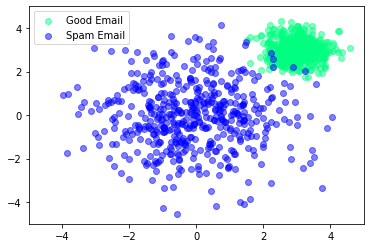

In [213]:
# "Create" the data set from last session
number_of_samples = [500, 500]
centers = [[0.0, 0.0], [3.0, 3.0]]
clusters_std = [1.5, 0.5]
x, y = sklearn.datasets.make_blobs(n_samples=number_of_samples, centers=centers,
                                   cluster_std=clusters_std, shuffle=True,
                                   random_state=0)
i = len(x)

plt.scatter(x[y==1][:i, 0], x[y==1][:i, 1], alpha=0.5, c="#00ff80", label="Good Email")
plt.scatter(x[y==0][:i, 0], x[y==0][:i, 1], alpha=0.5, c="blue", label="Spam Email")
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.legend()

# Unsupervised Learning

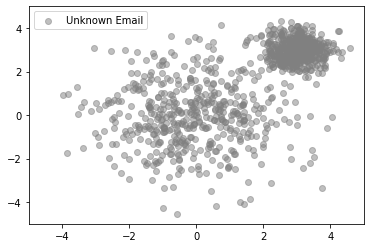

In [177]:
fig, ax = plt.subplots()
plt.scatter(x[:, 0], x[:, 1], c="gray", alpha=0.5, label="Unknown Email")
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.legend()
plt.savefig("./figures/03_email-kmeans-unknown.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [180]:
kmens = sklearn.cluster.KMeans(n_clusters=2)
y_pred = kmens.fit_predict(x)


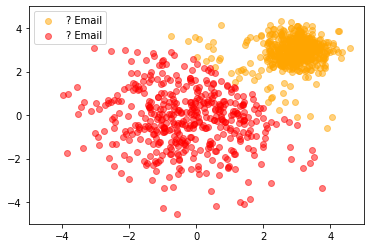

In [212]:
fig, ax = plt.subplots()

i = len(x)

plt.scatter(x[:i, 0][y_pred[:i]==0], x[:i, 1][y_pred[:i]==0], alpha=0.5, c="orange", label="? Email")
plt.scatter(x[:i, 0][y_pred[:i]==1], x[:i, 1][y_pred[:i]==1], alpha=0.5, c="red", label="? Email")
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.legend()
plt.savefig("./figures/03_email-kmeans-cluster-2.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)
plt.show()

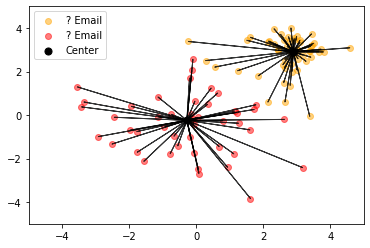

In [211]:
fig, ax = plt.subplots()

i = 100


for p in range(i):
    plt.arrow(x[:i, 0][p], x[:i, 1][p], kmens.cluster_centers_[y_pred[p], 0]-x[:i, 0][p], kmens.cluster_centers_[y_pred[p], 1]-x[:i, 1][p], alpha=0.8, length_includes_head=True, head_width=0.08, head_length=0.00002)
    
plt.scatter(x[:i, 0][y_pred[:i]==0], x[:i, 1][y_pred[:i]==0], alpha=0.5, c="orange", label="? Email")
plt.scatter(x[:i, 0][y_pred[:i]==1], x[:i, 1][y_pred[:i]==1], alpha=0.5, c="red", label="? Email")

plt.scatter(kmens.cluster_centers_[:i, 0], kmens.cluster_centers_[:i, 1], c="k", label="Center", s=50)
, 
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.legend()
plt.savefig("./figures/03_email-kmeans-cluster-2-mean-arrows.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)
plt.show()

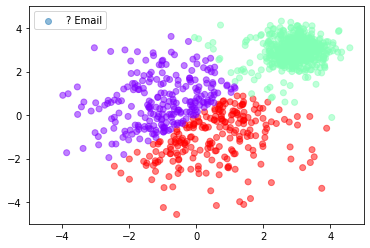

In [23]:
y_pred = sklearn.cluster.KMeans(n_clusters=3).fit_predict(x)
fig, ax = plt.subplots()

plt.scatter(x[:, 0], x[:, 1], alpha=0.5, c=y_pred, cmap="rainbow", label="? Email")
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.legend()
plt.savefig("./figures/03_email-kmeans-cluster-3.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)
plt.show()

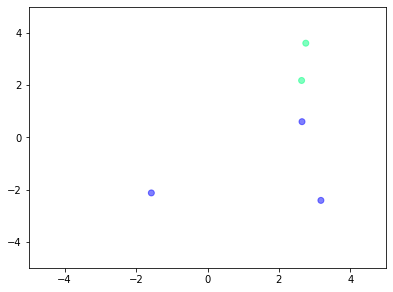

In [59]:
fig, ax = plt.subplots(figsize=(6.4, 4.8))
def init():
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    scatter = ax.scatter(x[:5, 0], x[:5, 1], c=y[:5], alpha=0.5, cmap="winter", label="Data points")

    return scatter, 

def update(i):
    ax.clear()
    ax.set_title("%i clusters" % i)
    y_pred = sklearn.cluster.KMeans(n_clusters=i).fit_predict(x)

    scatter = ax.scatter(x[:, 0], x[:, 1], alpha=0.5, c=y_pred, cmap="rainbow", label="? Email")

    return scatter,

anim = FuncAnimation(fig, update, frames=np.arange(2, 15), init_func=init, blit=True, interval=1500)
print("")

In [60]:
HTML(anim.to_html5_video())

# PCA

In [76]:
transformer = sklearn.decomposition.MiniBatchSparsePCA(n_components=1, batch_size=50, random_state=0)
transformer.fit(x){dear_fullname}
X_transformed = transformer.transform(x)
X_transformed.shape

(1000, 1)

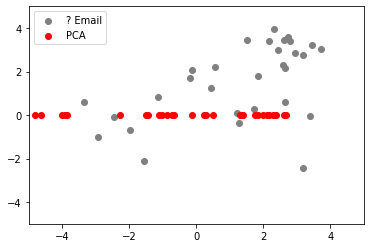

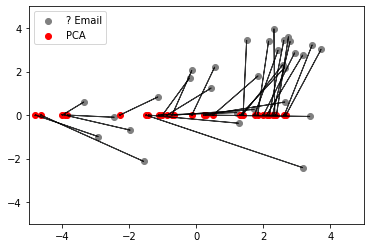

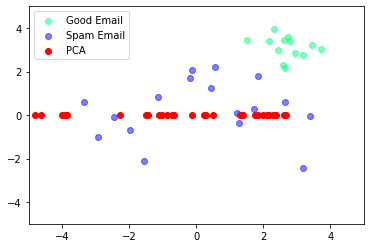

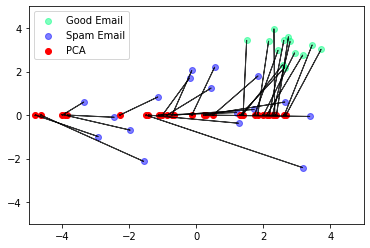

In [123]:
i = 30
for showEmailType in [False, True]:
    for showarrows in [False, True]:
        fig, ax = plt.subplots()
        if (showarrows):
            for p in range(i):
                if (y[p]==1):
                    plt.arrow(x[:i, 0][p], x[:i, 1][p], X_transformed[:i, 0][p]-x[:i, 0][p], -x[:i, 1][p], alpha=0.8, length_includes_head=True, head_width=0.08, head_length=0.00002)
                if (y[p]==0):
                    plt.arrow(x[:i, 0][p], x[:i, 1][p], X_transformed[:i, 0][p]-x[:i, 0][p], -x[:i, 1][p], alpha=0.8, length_includes_head=True, head_width=0.08, head_length=0.00002)

        if (showEmailType):

            plt.scatter(x[:i, 0][y[:i]==1], x[:i, 1][y[:i]==1], alpha=0.5, c="#00ff80", label="Good Email")
            plt.scatter(x[:i, 0][y[:i]==0], x[:i, 1][y[:i]==0], alpha=0.5, c="blue", label="Spam Email")
        else:
            plt.scatter(x[:i, 0], x[:i, 1], c="gray", label="? Email")
        #plt.scatter(x[y==0][:i, 0], x[y==0][:i, 1], alpha=0.5, c="blue", label="Spam Email")

        plt.scatter(X_transformed[:i, 0], np.zeros(i), c="red", label="PCA")
        plt.xlim(-5,5)
        plt.ylim(-5,5)
        plt.legend()
        if (showEmailType):
            plt.savefig("./figures/03_email-PCA-10-Labled-%s.png" % showarrows, dpi=500, bbox_inches = 'tight', pad_inches = 0)
        else:
            plt.savefig("./figures/03_email-PCA-10-Unknown-%s.png" % showarrows, dpi=500, bbox_inches = 'tight', pad_inches = 0)
            
            
            